In [1]:
import boto3
import pandas as pd

In [2]:
client = boto3.client(
    's3',
    aws_access_key_id='',
    aws_secret_access_key=''
)

# Session Data

In [3]:
## Load the session data 
bucket_name = 'msds630projbucket' # Add your bucket name
file_name = 'raw_csv/sessions.csv'
s3 = boto3.resource('s3')
bucket = s3.Bucket(bucket_name)
obj = bucket.Object(key=file_name)  # S3 uses key-value structure wherekey is your file name 
file_content = obj.get()["Body"].read().decode('utf-8')  # Read the Body which is the contents of the file.

In [4]:

import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO # Python 2.x
else:
    from io import StringIO # Python 3.x
# read data into pandas dataframe
df = pd.read_csv(StringIO(file_content))

In [5]:
df = pd.read_csv(StringIO(file_content))

In [6]:
df.head(4) ## show the first few lines in seesion dataframe

,app_id,session_id,start_timestamp,timezone,timezone_offset,previous_sessions_duration,user_created_timestamp,is_user_first_session,is_session,is_developer,...,country,region,city,latitude,longitude,locale,os_name,session_index,device_id,user_id_hash
0,4724682771660800,5558845121177764917,1542215364580,Asia/Manila,28800000.0,25837591,1538874289458,False,True,False,...,PH,00,makati,14.554729,121.024445,en_GB,Android OS,30,546a3d98-d540-4e72-ad82-9ebd64e0839b,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,4724682771660800,2201961907282901522,1543712977293,Asia/Manila,28800000.0,35050130,1538874289458,False,True,False,...,PH,00,quezon city,14.676041,121.043701,en_GB,Android OS,47,546a3d98-d540-4e72-ad82-9ebd64e0839b,9943447915df3a45fd6720a026af905b6da6b56a37701b...
2,4724682771660800,18781111175537580,1539215568666,Asia/Manila,28800000.0,11343848,1538874289458,False,True,False,...,PH,00,makati,14.554729,121.024445,en_GB,Android OS,10,546a3d98-d540-4e72-ad82-9ebd64e0839b,9943447915df3a45fd6720a026af905b6da6b56a37701b...
3,4724682771660800,1477540082628742048,1540120743010,Asia/Manila,28800000.0,13499724,1538874289458,False,True,False,...,PH,11,davao city,7.190708,125.455338,en_GB,Android OS,13,546a3d98-d540-4e72-ad82-9ebd64e0839b,9943447915df3a45fd6720a026af905b6da6b56a37701b...


In [7]:
df.columns ## show the columns of the session 

Index(['app_id', 'session_id', 'start_timestamp', 'timezone',
       'timezone_offset', 'previous_sessions_duration',
       'user_created_timestamp', 'is_user_first_session', 'is_session',
       'is_developer', 'is_wau', 'is_mau', 'country', 'region', 'city',
       'latitude', 'longitude', 'locale', 'os_name', 'session_index',
       'device_id', 'user_id_hash'],
      dtype='object')

### Description of the Session Data
* app_id: application id
* session_id: randomly generated id for the session
* start_timestamp: epoch (milliseconds) of session start
* user_id_hash: user id
* session_index: lifetime count of sessions
* is_session: whether or not the given session is an online session or offline session (true=online, null=offline)
* is_developer: whether or not the given user is a mobile developer (developers are not real app users)(true=developer, null=not developer)
* is_wau: whether this record should be counted as a weekly active user for this day (true/null)
* is_mau: whether this record should be counted as a monthly active user for this day (true/null)
* user_created_timestamp: epoch (milliseconds) of when the user was created
* is_user_first_session: whether or not the given session is user's first session with the app (true/null)
* previous_session_duration: length of last session in seconds
* device_id: mobile device id associated with the session
* os_name: mobile operating system
* timezone: user's timezone during the session
* timezone_offset: user's timezone offset against UTC
* country: user's country during the session
* region: user's region during the session
* city: user's city during the session
* latitude: user's latitude at session start
* longitude: user's longitude at session start
* locale: user's local during the session


## Check and remove the missing values in the  session  dataframe

In [12]:
df.shape[0] ## there are 6239836 in the dataframe 

6239836

In [10]:
df.isnull().sum()

app_id                            0
session_id                        0
start_timestamp                   0
timezone                       9538
timezone_offset                9538
previous_sessions_duration        0
user_created_timestamp            0
is_user_first_session             0
is_session                        0
is_developer                      0
is_wau                            0
is_mau                            0
country                       16657
region                        12926
city                          12918
latitude                      12918
longitude                     12918
locale                         9538
os_name                       27444
session_index                     0
device_id                     18073
user_id_hash                      0
dtype: int64

Drop the missing value from the dataframe 

In [13]:
df1 = df.dropna()

In [15]:
df.shape[0]- df1.shape[0] ## we have drop 37918 rows from the whole dataset 

37918

In [16]:
df1.shape[0] # Number of rows of removing the missing values 

6201918

### We also need to remove value when is_mau and is_wau is true.

In [20]:
df1.is_mau.value_counts()  ## no true left 

False    6201918
Name: is_mau, dtype: int64

In [21]:
df1.is_wau.value_counts()  ## no true left 

False    6201918
Name: is_wau, dtype: int64

## Get the data distribution of  previous_sessions_duration

In [17]:
df1.previous_sessions_duration.describe()

count    6.201918e+06
mean     4.205090e+07
std      7.497780e+07
min      0.000000e+00
25%      3.041209e+06
50%      1.476391e+07
75%      4.924822e+07
max      1.956532e+09
Name: previous_sessions_duration, dtype: float64

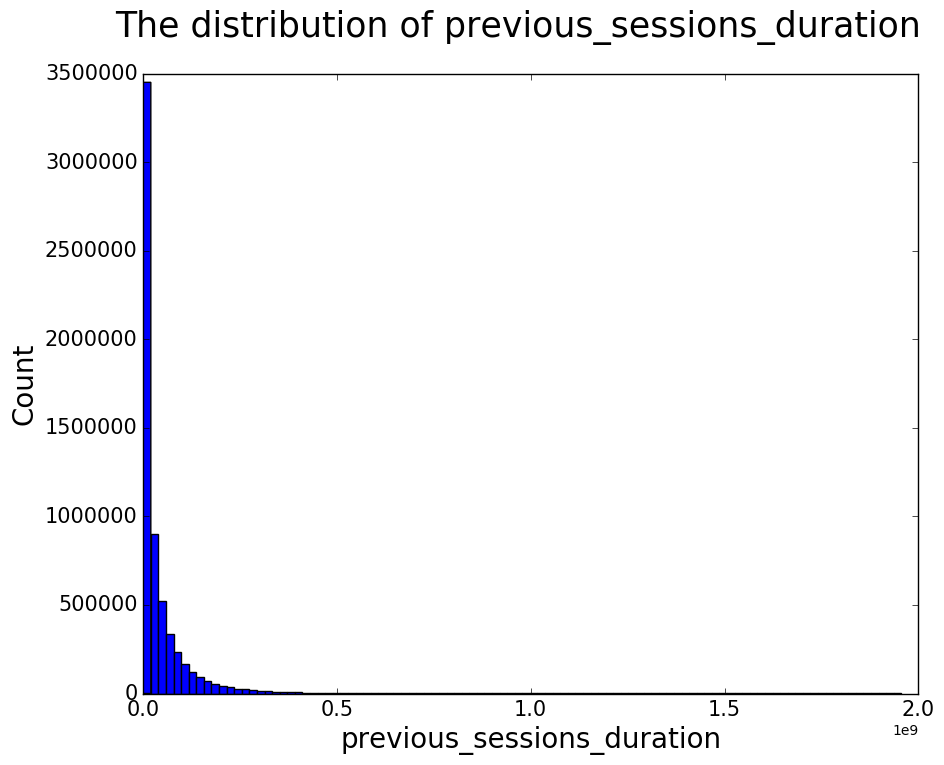

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
plt.hist(df1.previous_sessions_duration, bins =100)
plt.xlabel("previous_sessions_duration", fontsize =20)
plt.ylabel("Count", fontsize =20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.suptitle('The distribution of previous_sessions_duration', fontsize =25)
plt.show()

The distribution of previous_sessions_duration is an exponetial distribution. At the time of previous_sessions_duration increase, the less likely they are. 


## is_user_first_session : 
is_user_first_seesion is an importan feature we need to check it. Usually, people in their first session seems unlikely to make purchase.


In [58]:
df1.groupby('is_user_first_session')['user_id_hash'].count()

is_user_first_session
False    5363296
True      838622
Name: user_id_hash, dtype: int64

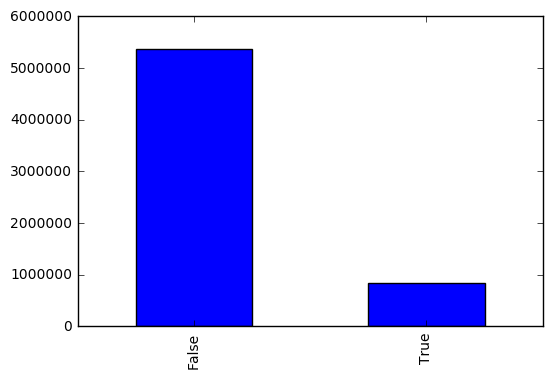

In [32]:
%matplotlib inline
pd.value_counts(df1['is_user_first_session']).plot.bar()

In our dataset, most of sessions are not the user first session. The ratio between them is around 6:1

## os_name 

In [61]:
df1.groupby('os_name')['user_id_hash'].count()

os_name
Android OS    4198130
iOS           1961437
iPhone OS       42351
Name: user_id_hash, dtype: int64

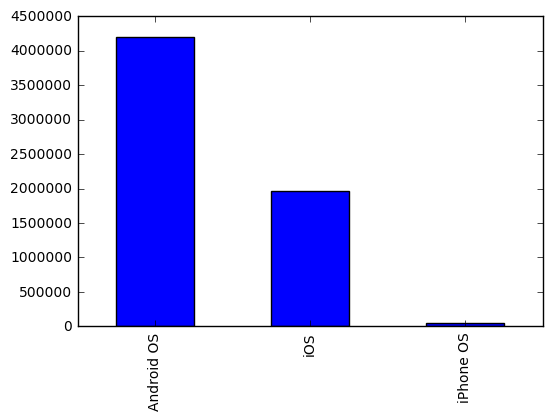

In [62]:
%matplotlib inline
pd.value_counts(df1['os_name']).plot.bar()

Most of user are using Android OS. We have both IOS and iphone OS. We believe they have some overlaps. We may consider to merge them together.

## is_developer

In [34]:
df1.is_developer.value_counts()  

False    6199336
True        2582
Name: is_developer, dtype: int64

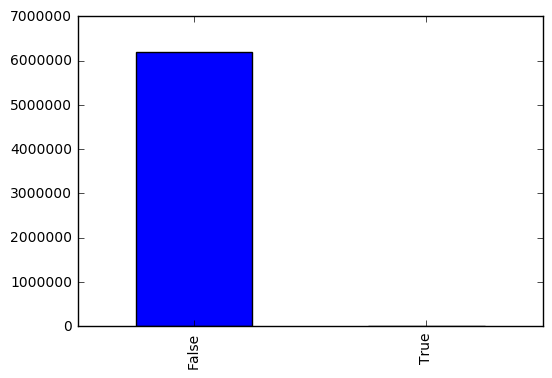

In [35]:
pd.value_counts(df1['is_developer']).plot.bar()

From the above plot, we can see most of uers are not developer.

## is_session : Online, Offline 

In [52]:
df1.is_session.value_counts() 

True     5159370
False    1042548
Name: is_session, dtype: int64

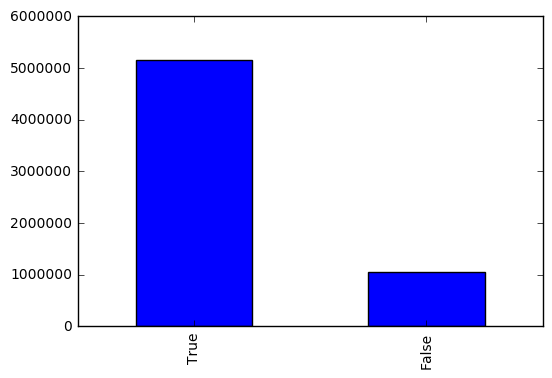

In [36]:
pd.value_counts(df1['is_session']).plot.bar()

The Online sessions are outweighted than the offline sessions. 

## TimeZone 

In [57]:
d1= df1.groupby('timezone')['user_id_hash'].count()
d = pd.DataFrame(d1)
d.sort_values(by='user_id_hash',ascending=False).head(15)## show the top 15 timezones in terms of num of users

,user_id_hash
timezone,
America/New_York,1220635
America/Chicago,881236
Europe/London,440045
America/Los_Angeles,359126
Asia/Kolkata,273996
Asia/Manila,255188
Asia/Calcutta,217286
Africa/Johannesburg,160536
America/Denver,131768


## device_id

In [45]:
len(df1.device_id.unique()) ## show the number of unique device_id 

612737

## country

In [48]:
len(df1.country.unique()) ## show the number of unique country 

228

In [56]:
d1= df1.groupby('country')['user_id_hash'].count()
d = pd.DataFrame(d1)
d.sort_values(by='user_id_hash',ascending=False).head(15) ## show the top 15 countries in terms of number of users

,user_id_hash
country,
US,2801229
IN,493055
GB,442294
PH,258448
CA,187894
ZA,164362
AU,147849
ID,102139
MY,87399


# messages.csv

In [3]:
## Load the session data 
bucket_name = 'msds630projbucket' # Add your bucket name
file_name = 'raw_csv/messages.csv'
s3 = boto3.resource('s3')
bucket = s3.Bucket(bucket_name)
obj = bucket.Object(key=file_name)  # S3 uses key-value structure wherekey is your file name 
file_content = obj.get()["Body"].read().decode('utf-8')  

In [4]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO # Python 2.x
else:
    from io import StringIO # Python 3.x
# read data into pandas dataframe
message = pd.read_csv(StringIO(file_content))

In [5]:
message.head(4)

,app_id,message_id,action_type,delivery_type,delivery_time_mode,goal_kind
0,6196435404455936,5420304779837440,__Push Notification,4,3,NaN
1,6196435404455936,5059935179767808,__Push Notification,0,3,NaN
2,6196435404455936,6563799154425856,__Webhook,4,3,NaN
3,6196435404455936,4680497250304000,__Push Notification,0,3,NaN


In [7]:
message.shape 

(2896, 6)

In [6]:
message.isnull().sum() ## half of the data is missing with the goal_kind 

app_id                   0
message_id               0
action_type              0
delivery_type            0
delivery_time_mode       0
goal_kind             1640
dtype: int64

### The description of the message data
app_id: application id
<br>
message_id: message id
<br>
action_type: type of the message <br>
delivery_type: (0: immediate, 1: scheduled, 2: manual, 3: trigger locally, 4: trigger server side, 5: recurring)<br>
delivery_time_mode: (0: browser time, 1: UTC, 2: user timezone, 3: optimal time)<br>
goal_kind: (0: metric, 1: funnel, 2: stack, 3: event, 4: state, 5: filtered, 6: user action)


### action_type

In [10]:
message.action_type.value_counts() ## The most type of the message is the Push Notification 

__Push Notification      1545
__Email                   356
Center Popup              250
Floating Interstitial     219
__Webhook                 200
__Newsfeed Message        109
Confirm                    69
Alert                      35
Interstitial               35
banner                     25
new_banner                 21
Custom Center Popup        15
Push Ask to Ask             4
message or action222        3
Web Interstitial            3
3-button Confirm            3
Banner                      3
Request App Rating          1
Name: action_type, dtype: int64

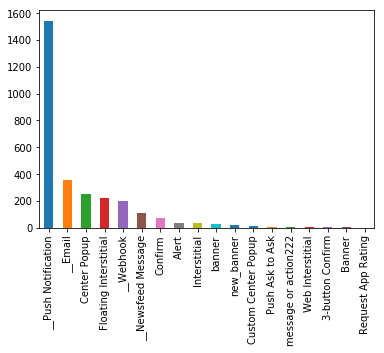

In [9]:
import pandas as pd
%matplotlib inline  
pd.value_counts(message['action_type']).plot.bar()

In [11]:
message.delivery_type.value_counts()

0    1794
1     609
4     491
2       2
Name: delivery_type, dtype: int64

### Delivery_type

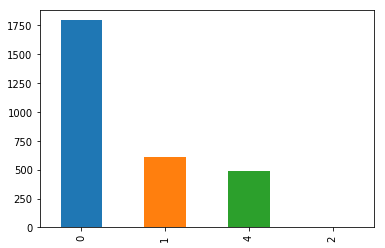

In [12]:
%matplotlib inline  
pd.value_counts(message['delivery_type']).plot.bar()

The dataset only has the following deliver type :
* 0: immediate, 
* 1: scheduled, 
* 2: manual,  
* 4: trigger server side 
<br>
Most of the deliver type is immediate, followed by scheduled and trigger sever side. We only had little manual deliver type.

### delivery_time_mode

In [13]:
message.delivery_time_mode.value_counts()

3    2456
2     334
0     104
1       2
Name: delivery_time_mode, dtype: int64

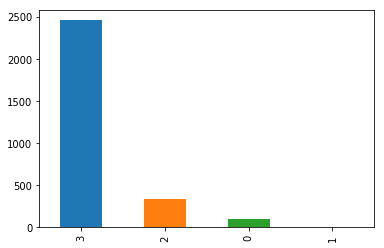

In [16]:
 pd.value_counts(message.delivery_time_mode).plot.bar()

The most of the dlivery_time_mode is optimal time and the least dlivery_time_mode is browser time

### goal_kind

In [14]:
message.goal_kind.value_counts()

3.0    704
6.0    415
0.0    117
4.0     20
Name: goal_kind, dtype: int64

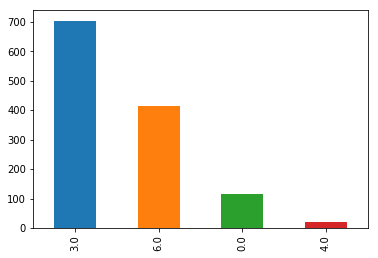

In [15]:
pd.value_counts(message.goal_kind).plot.bar()

We only have the following goal_kind in our dataset : 
* 3: event
* 6: user action
* 0: metric
* 4: state   
Most of the goal_kind is about the event.